<p style="background-color:#f0f8ff;font-family:Arial;color:#2c3e50;font-size:300%;text-align:center;border-radius:40px 40px;">Churn Prediction Task📊</p>


 ### Name  : Zeyad Ahmed Mostafa
 ### Mail : ziada00700@gmail.com
 ### Phone : 01200249877

## ***Data Exploration***

> ### ***import necessery Libraries***


In [105]:
# Importing libraries
import warnings
warnings.filterwarnings('ignore')

# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

# Model selection and preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV 
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE

# Machine learning models
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier, plot_importance
from sklearn.naive_bayes import GaussianNB
from lightgbm import LGBMClassifier

# Model evaluation
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score , f1_score ,precision_score

# Utility
from tqdm import tqdm
import joblib
import pickle


>### ***Read CSV File***

In [106]:
train_data = pd.read_csv(r"C:\Users\Zeyad Ahmed\Downloads\churn-bigml-80.csv")
test_data = pd.read_csv(r"C:\Users\Zeyad Ahmed\Downloads\churn-bigml-20.csv")
full_data = pd.concat([train_data , test_data] , axis = 0 , ignore_index = True)

In [107]:
train_data

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
2661    SC              79        415                 No              No   
2662    AZ             192        415                 No             Yes   
2663    WV              68        415                 No              No   
2664    RI              28        510                 No              No   
2665    TN              74        415                 No             Yes   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
2661                      0              134.7               98   
2662                     36              156.2               77   
2663                      0              231.1               57   
2664                      0              180.8              109   
2665                     25              234.4              113   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
2661             22.90              189.7               68             16.12   
2662             26.55              215.5              126             18.32   
2663             39.29              153.4               55             13.04   
2664             30.74              288.8               58             24.55   
2665             39.85              265.9               82             22.60   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
2661                221.4                128                9.96   
2662                279.1                 83               12.56   
2663                191.3                123                8.61   
2664                191.9                 91                8.64   
2665                241.4                 77               10.86   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
2661                11.8                 5            

In [108]:
test_data

State  Account length  Area code International plan Voice mail plan  \
0      LA             117        408                 No              No   
1      IN              65        415                 No              No   
2      NY             161        415                 No              No   
3      SC             111        415                 No              No   
4      HI              49        510                 No              No   
..    ...             ...        ...                ...             ...   
662    WI             114        415                 No             Yes   
663    AL             106        408                 No             Yes   
664    VT              60        415                 No              No   
665    WV             159        415                 No              No   
666    CT             184        510                Yes              No   

     Number vmail messages  Total day minutes  Total day calls  \
0                        0              184.5               97   
1                        0              129.1              137   
2                        0              332.9               67   
3                        0              110.4              103   
4                        0              119.3              117   
..                     ...                ...              ...   
662                     26              137.1               88   
663                     29               83.6              131   
664                      0              193.9              118   
665                      0              169.8              114   
666                      0              213.8              105   

     Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0               31.37              351.6               80             29.89   
1               21.95              228.5               83             19.42   
2               56.59              317.8               97             27.01   
3               18.77              137.3              102             11.67   
4               20.28              215.1              109             18.28   
..                ...                ...              ...               ...   
662             23.31              155.7              125             13.23   
663             14.21              203.9              131             17.33   
664             32.96               85.0              110              7.23   
665             28.87              197.7              105             16.80   
666             36.35              159.6               84             13.57   

     Total night minutes  Total night calls  Total night charge  \
0                  215.8                 90                9.71   
1                  208.8                111                9.40   
2                  160.6                128                7.23   
3                  189.6                105                8.53   
4                  178.7                 90                8.04   
..                   ...                ...                 ...   
662                247.6                 94               11.14   
663                229.5                 73               10.33   
664                210.1                134                9.45   
665                193.7                 82                8.72   
666                139.2                137                6.26   

     Total intl minutes  Total intl calls  Total intl charge  \
0                   8.7                 4               2.35   
1                  12.7                 6               3.43   
2                   5.4                 9               1.46   
3                   7.7                 6               2.08   
4                  11.1                 1               3.00   
..                  ...               ...                ...   
662                11.5                 7               3.11   
663                 8.1                 3   

In [109]:
full_data

State  Account length  Area code International plan Voice mail plan  \
0       KS             128        415                 No             Yes   
1       OH             107        415                 No             Yes   
2       NJ             137        415                 No              No   
3       OH              84        408                Yes              No   
4       OK              75        415                Yes              No   
...    ...             ...        ...                ...             ...   
3328    WI             114        415                 No             Yes   
3329    AL             106        408                 No             Yes   
3330    VT              60        415                 No              No   
3331    WV             159        415                 No              No   
3332    CT             184        510                Yes              No   

      Number vmail messages  Total day minutes  Total day calls  \
0                        25              265.1              110   
1                        26              161.6              123   
2                         0              243.4              114   
3                         0              299.4               71   
4                         0              166.7              113   
...                     ...                ...              ...   
3328                     26              137.1               88   
3329                     29               83.6              131   
3330                      0              193.9              118   
3331                      0              169.8              114   
3332                      0              213.8              105   

      Total day charge  Total eve minutes  Total eve calls  Total eve charge  \
0                45.07              197.4               99             16.78   
1                27.47              195.5              103             16.62   
2                41.38              121.2              110             10.30   
3                50.90               61.9               88              5.26   
4                28.34              148.3              122             12.61   
...                ...                ...              ...               ...   
3328             23.31              155.7              125             13.23   
3329             14.21              203.9              131             17.33   
3330             32.96               85.0              110              7.23   
3331             28.87              197.7              105             16.80   
3332             36.35              159.6               84             13.57   

      Total night minutes  Total night calls  Total night charge  \
0                   244.7                 91               11.01   
1                   254.4                103               11.45   
2                   162.6                104                7.32   
3                   196.9                 89                8.86   
4                   186.9                121                8.41   
...                   ...                ...                 ...   
3328                247.6                 94               11.14   
3329                229.5                 73               10.33   
3330                210.1                134                9.45   
3331                193.7                 82                8.72   
3332                139.2                137                6.26   

      Total intl minutes  Total intl calls  Total intl charge  \
0                   10.0                 3               2.70   
1                   13.7                 3               3.70   
2                   12.2                 5               3.29   
3                    6.6                 7               1.78   
4                   10.1                 3               2.73   
...                  ...               ...                ...   
3328                11.5                 7            

>### ***Shape of data***

In [110]:
full_data.shape
print(f'The number of rows (Observations) : {full_data.shape[0]}')
print(f'The number of columns (Features) : {full_data.shape[1]}')

The number of rows (Observations) : 3333
The number of columns (Features) : 20


> ### ***Columns***

In [111]:
columns = pd.DataFrame(full_data.columns , columns=['Column Name'])
columns

Column Name
0                    State
1           Account length
2                Area code
3       International plan
4          Voice mail plan
5    Number vmail messages
6        Total day minutes
7          Total day calls
8         Total day charge
9        Total eve minutes
10         Total eve calls
11        Total eve charge
12     Total night minutes
13       Total night calls
14      Total night charge
15      Total intl minutes
16        Total intl calls
17       Total intl charge
18  Customer service calls
19                   Churn

### Target is > (***Churn***)

> ### ***dtypes of The data***

In [112]:
dtypes = pd.DataFrame(full_data.dtypes , columns=['Data type']).reset_index(names=['Column Name'])
dtypes

Column Name Data type
0                    State    object
1           Account length     int64
2                Area code     int64
3       International plan    object
4          Voice mail plan    object
5    Number vmail messages     int64
6        Total day minutes   float64
7          Total day calls     int64
8         Total day charge   float64
9        Total eve minutes   float64
10         Total eve calls     int64
11        Total eve charge   float64
12     Total night minutes   float64
13       Total night calls     int64
14      Total night charge   float64
15      Total intl minutes   float64
16        Total intl calls     int64
17       Total intl charge   float64
18  Customer service calls     int64
19                   Churn      bool

>### ***Data Information***

In [113]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

> ### ***Chek nulls & drop it***

<Axes: >

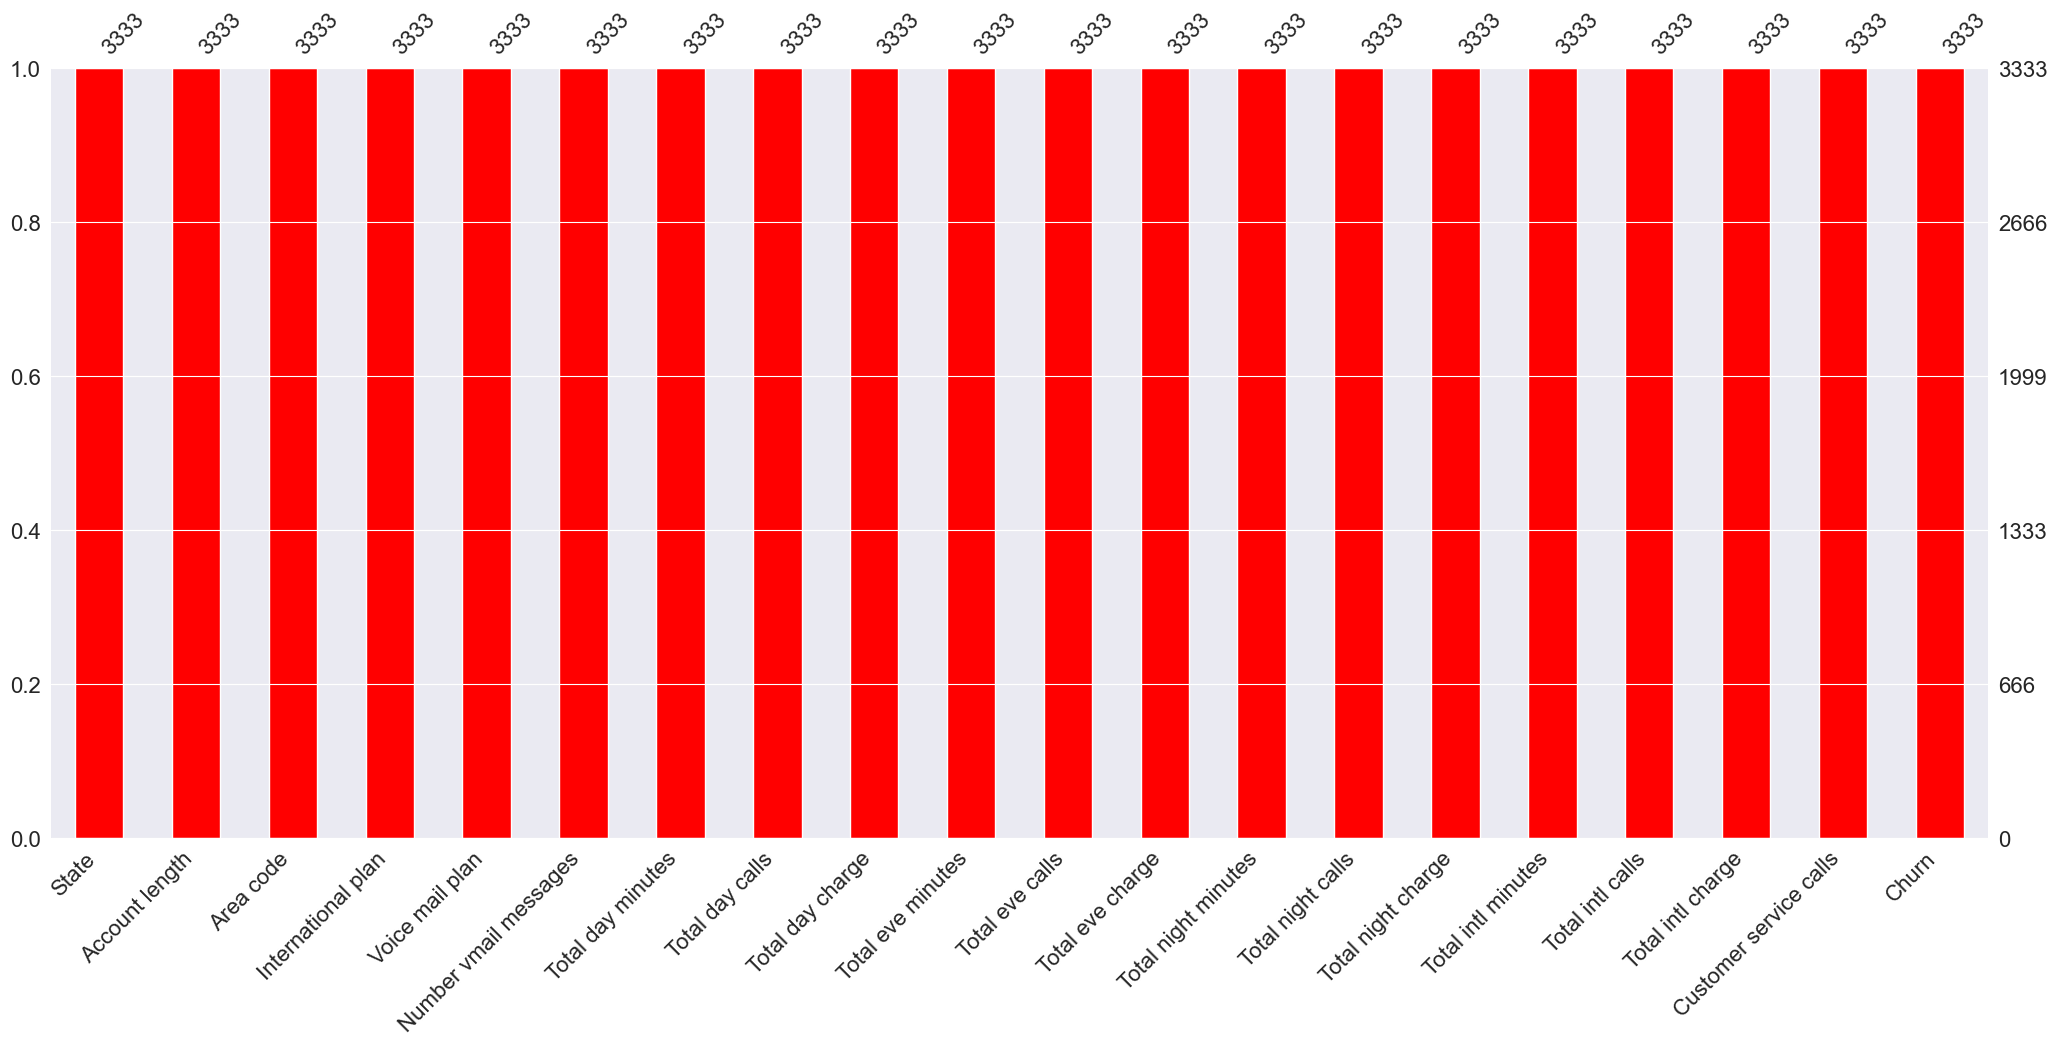

In [114]:
msno.bar(full_data,color='red')  

In [115]:
pd.DataFrame({'Number of Missing Values':full_data.isnull().sum(),'Percentage Of Missing Values (%)':(full_data.isnull().sum() / full_data.shape[0]) * 100})

Number of Missing Values  \
State                                          0   
Account length                                 0   
Area code                                      0   
International plan                             0   
Voice mail plan                                0   
Number vmail messages                          0   
Total day minutes                              0   
Total day calls                                0   
Total day charge                               0   
Total eve minutes                              0   
Total eve calls                                0   
Total eve charge                               0   
Total night minutes                            0   
Total night calls                              0   
Total night charge                             0   
Total intl minutes                             0   
Total intl calls                               0   
Total intl charge                              0   
Customer service calls                         0   
Churn                                          0   

                        Percentage Of Missing Values (%)  
State                                                0.0  
Account length                                       0.0  
Area code                                            0.0  
International plan                                   0.0  
Voice mail plan                                      0.0  
Number vmail messages                                0.0  
Total day minutes                                    0.0  
Total day calls                                      0.0  
Total day charge                                     0.0  
Total eve minutes                                    0.0  
Total eve calls                                      0.0  
Total eve charge                                     0.0  
Total night minutes                                  0.0  
Total night calls                                    0.0  
Total night charge                                   0.0  
Total intl minutes                                   0.0  
Total intl calls                                     0.0  
Total intl charge                                    0.0  
Customer service calls                               0.0  
Churn                                                0.0

> ### ***Chek duplicated values***

In [116]:
full_data[full_data.duplicated()]

Empty DataFrame
Columns: [State, Account length, Area code, International plan, Voice mail plan, Number vmail messages, Total day minutes, Total day calls, Total day charge, Total eve minutes, Total eve calls, Total eve charge, Total night minutes, Total night calls, Total night charge, Total intl minutes, Total intl calls, Total intl charge, Customer service calls, Churn]
Index: []

> ### ***descriptive statistics***

>> numerical columns

In [117]:
full_data.describe(include='number').T.style.highlight_max(subset=['mean'	,'std'	,'min'	,'25%'	,'50%'	,'75%'	,'max'],color='green')

>>Categrical columns

In [118]:
full_data.describe(exclude='number').T

count unique    top  freq
State               3333     51     WV   106
International plan  3333      2     No  3010
Voice mail plan     3333      2     No  2411
Churn               3333      2  False  2850


<p style="background-color:#f0f8ff;font-family:Arial;color:#2c3e50;font-size:300%;text-align:center;border-radius:40px 40px;"><i>Data Analysis (EDA) and Visualization📊</i></p>




### ***Validating data types & Updating data types***


In [119]:
# Validating data types & Updating data types
dtypes

Column Name Data type
0                    State    object
1           Account length     int64
2                Area code     int64
3       International plan    object
4          Voice mail plan    object
5    Number vmail messages     int64
6        Total day minutes   float64
7          Total day calls     int64
8         Total day charge   float64
9        Total eve minutes   float64
10         Total eve calls     int64
11        Total eve charge   float64
12     Total night minutes   float64
13       Total night calls     int64
14      Total night charge   float64
15      Total intl minutes   float64
16        Total intl calls     int64
17       Total intl charge   float64
18  Customer service calls     int64
19                   Churn      bool

>>Drop unnecessery columns

These charge-related features are likely derived from other features in the dataset

Including both the minutes and charge columns introduces redundancy because they convey the same information in different forms. This redundancy can confuse the model and reduce its ability to generalize.

In [120]:
full_data.drop(columns=['State' , "Area code" , 'Total day charge', 'Total eve charge', 
               'Total night charge', 'Total intl charge'],
                     inplace=True)

> ### ***Select categorical and numerical columns***

In [121]:
cat_columns = list(full_data.select_dtypes(exclude=['number']).columns)
numerical_columns = list(full_data.select_dtypes(include='number'))
print(f"Categrical columns >> {cat_columns} <<")
print(f"Numerical columns >> {numerical_columns} <<")
full_data[cat_columns] = full_data[cat_columns].astype('category')


Categrical columns >> ['International plan', 'Voice mail plan', 'Churn'] <<
Numerical columns >> ['Account length', 'Number vmail messages', 'Total day minutes', 'Total day calls', 'Total eve minutes', 'Total eve calls', 'Total night minutes', 'Total night calls', 'Total intl minutes', 'Total intl calls', 'Customer service calls'] <<


> ## ***Independent Feature Analysis & Linking Features to Target Variable***

In [122]:
# The number of Categries in Each Columns
for n,i in enumerate(cat_columns , start=1) :
    print(f'{n}-The number of Categories in "{i}" is {full_data[i].nunique()} and The Categries is > {full_data[i].unique()}\n ')

1-The number of Categories in "International plan" is 2 and The Categries is > ['No', 'Yes']
Categories (2, object): ['No', 'Yes']
 
2-The number of Categories in "Voice mail plan" is 2 and The Categries is > ['Yes', 'No']
Categories (2, object): ['No', 'Yes']
 
3-The number of Categories in "Churn" is 2 and The Categries is > [False, True]
Categories (2, bool): [False, True]
 


## Define Value counts function

In [123]:
def value_counts(data, column):
    value_counts = data[column].value_counts(normalize=True, dropna=False) * 100
    formatted_data = pd.DataFrame({
        'Count': data[column].value_counts(dropna=False),
        'Percentage (%)': value_counts.round(2)
    }).reset_index()

    formatted_data.columns = [column.capitalize(), 'Count', 'Percentage (%)']

    return formatted_data


## define function calculate_Churn_rates

In [124]:
def calculate_churn_rates(df, column):
    """
    Calculate churn and existing customer rates for a specified categorical column.

    Parameters:
    - df: pandas DataFrame containing customer data.
    - column: str, the name of the categorical column to analyze.

    Returns:
    - A DataFrame with counts and churn rates for each category in the specified column.
    """
    # Create a crosstab to count attrited and existing customers by the specified column
    crosstab = pd.crosstab(df[column], df['Churn'])

    # Add total counts for each category
    crosstab['Total'] = crosstab.sum(axis=1)

    # Calculate churn rate and existing customer rate
    crosstab['churn Rate (%)'] = (crosstab[True] / crosstab['Total']) * 100
    crosstab['Existing Customer Rate (%)'] = (crosstab[False] / crosstab['Total']) * 100

    # Reset index to turn the index into a column
    crosstab.reset_index(inplace=True)

    return crosstab.style.highlight_max(subset=['churn Rate (%)'],color='#ff6e76')

# Example usage with your DataFrame (assuming it's named 'data')
churn_results = calculate_churn_rates(full_data, 'International plan')

In [125]:
for col in cat_columns:
    print(f'The {col} Value counts')
    display(value_counts(full_data , col))
    print(f'The {col} Value counts by Target(Attrition_Flag)')
    display(calculate_churn_rates(full_data,col))

The International plan Value counts


International plan  Count  Percentage (%)
0                 No   3010           90.31
1                Yes    323            9.69

The International plan Value counts by Target(Attrition_Flag)


The Voice mail plan Value counts


Voice mail plan  Count  Percentage (%)
0              No   2411           72.34
1             Yes    922           27.66

The Voice mail plan Value counts by Target(Attrition_Flag)


The Churn Value counts


Churn  Count  Percentage (%)
0  False   2850           85.51
1   True    483           14.49

The Churn Value counts by Target(Attrition_Flag)


In [126]:
full_data.groupby('International plan')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

International plan                   No         Yes
Account length         max   243.000000  224.000000
                       min     1.000000    2.000000
                       mean  100.742193  104.071207
Number vmail messages  max    51.000000   45.000000
                       min     0.000000    0.000000
                       mean    8.059801    8.464396
Total day minutes      max   350.800000  346.800000
                       min     0.000000   12.500000
                       mean  178.893887  187.986997
Total day calls        max   165.000000  146.000000
                       min     0.000000   42.000000
                       mean  100.410963  100.665635
Total eve minutes      max   361.800000  363.700000
                       min     0.000000   60.800000
                       mean  200.663090  203.936842
Total eve calls        max   170.000000  159.000000
                       min     0.000000   50.000000
                       mean  100.074419  100.486068
Total night minutes    max   395.000000  352.500000
                       min    23.200000   72.400000
                       mean  201.350831  196.410217
Total night calls      max   175.000000  154.000000
                       min    33.000000   48.000000
                       mean  100.027907  100.851393
Total intl minutes     max    18.900000   20.000000
                       min     0.000000    1.300000
                       mean   10.195349   10.628173
Total intl calls       max    19.000000   20.000000
                       min     0.000000    1.000000
                       mean    4.465449    4.609907
Customer service calls max     9.000000    9.000000
                       min     0.000000    0.000000
                       mean    1.573422    1.464396

In [127]:
full_data.groupby('Voice mail plan')[numerical_columns].agg(['max' , 'min' , 'mean',]).T

Voice mail plan                      No         Yes
Account length         max   243.000000  221.000000
                       min     1.000000    1.000000
                       mean  100.992949  101.252711
Number vmail messages  max     0.000000   51.000000
                       min     0.000000    4.000000
                       mean    0.000000   29.277657
Total day minutes      max   350.800000  322.400000
                       min     0.000000    2.600000
                       mean  179.831813  179.626790
Total day calls        max   165.000000  163.000000
                       min     0.000000   35.000000
                       mean  100.573206  100.075922
Total eve minutes      max   363.700000  361.800000
                       min     0.000000   42.200000
                       mean  200.304770  202.746963
Total eve calls        max   168.000000  170.000000
                       min     0.000000   37.000000
                       mean  100.193696   99.906725
Total night minutes    max   395.000000  381.900000
                       min    43.700000   23.200000
                       mean  200.681958  201.369089
Total night calls      max   166.000000  175.000000
                       min    33.000000   38.000000
                       mean   99.919535  100.599783
Total intl minutes     max    18.900000   20.000000
                       min     0.000000    0.000000
                       mean   10.239569   10.231345
Total intl calls       max    19.000000   20.000000
                       min     0.000000    0.000000
                       mean    4.467856    4.509761
Customer service calls max     9.000000    9.000000
                       min     0.000000    0.000000
                       mean    1.577354    1.524946

## ***Analyze distribution across target categories***

>>The add_custom_stats function enhances a value counts DataFrame by adding minimum, maximum, and average statistics for specified columns, and provides a styled output with bar plot-like visualizations for better data interpretation.

In [128]:
def add_custom_stats(df, value_counts_df, category_column, columns):
    """
    Adds minimum, maximum, and average statistics for each specified column to the value counts DataFrame,
    with styled output resembling a bar plot.

    Parameters:
    - df: Original pandas DataFrame containing the data.
    - value_counts_df: DataFrame with value counts (output of value_counts function).
    - category_column: str, name of the column containing categories.
    - columns: list of str, names of the columns to calculate statistics for.

    Returns:
    - A styled DataFrame with added statistics columns and bar plot-like representation.
    """
    # Find the correct case for the category column in both DataFrames
    df_category_col = next((col for col in df.columns if col.lower() == category_column.lower()), None)
    vc_category_col = next((col for col in value_counts_df.columns if col.lower() == category_column.lower()), None)

    if df_category_col is None or vc_category_col is None:
        raise ValueError(f"Column '{category_column}' not found in one or both DataFrames.")

    stats_cols = []
    for col in columns:
        # Find the correct case for each column
        correct_col = next((c for c in df.columns if c.lower() == col.lower()), None)
        if correct_col is None:
            raise ValueError(f"Column '{col}' not found in the DataFrame.")

        # Calculate statistics for each category
        stats = df.groupby(df_category_col)[correct_col].agg(['min', 'max', 'mean']).reset_index()
        stats.columns = [df_category_col, f'min_{col}', f'max_{col}', f'avg_{col}']

        # Round the values to 2 decimal places
        stats[f'min_{col}'] = stats[f'min_{col}'].round(2)
        stats[f'max_{col}'] = stats[f'max_{col}'].round(2)
        stats[f'avg_{col}'] = stats[f'avg_{col}'].round(2)

        stats_cols.append(stats)

    # Merge all statistics DataFrames
    result_df = value_counts_df.copy()
    for stats in stats_cols:
        result_df = pd.merge(result_df, stats, left_on=vc_category_col, right_on=df_category_col, how='left')

    # Drop duplicate category column
    result_df = result_df.loc[:, ~result_df.columns.duplicated()]

    # Reorder columns
    column_order = [vc_category_col, 'Count', 'Percentage (%)'] + [col for sublist in [[f'min_{col}', f'max_{col}', f'avg_{col}'] for col in columns] for col in sublist]
    result_df = result_df[column_order]

    # Style the DataFrame
    format_dict = {f'Percentage (%)': '{:.2f}%'}
    for col in columns:
        format_dict.update({f'min_{col}': '{:.2f}', f'max_{col}': '{:.2f}', f'avg_{col}': '{:.2f}'})

    styled_df = result_df.style.format(format_dict)

    # Apply bar representation
    for col in columns:
        max_min = result_df[f'min_{col}'].max()
        max_max = result_df[f'max_{col}'].max()
        max_avg = result_df[f'avg_{col}'].max()

        styled_df.bar(subset=[f'min_{col}'], color='#5ad8a6', vmin=0, vmax=max_min)
        styled_df.bar(subset=[f'max_{col}'], color='#ff6e76', vmin=0, vmax=max_max)
        styled_df.bar(subset=[f'avg_{col}'], color='#fac858', vmin=0, vmax=max_avg)

    # Set table styles for night mode compatibility
    styled_df.set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#2c3e50'), ('color', 'white')]},
        {'selector': 'td', 'props': [('background-color', '#34495e'), ('color', 'white')]},
    ])

    return styled_df




In [129]:
value_countsd = value_counts(full_data ,'Churn')
value_countsd

Churn  Count  Percentage (%)
0  False   2850           85.51
1   True    483           14.49

In [130]:
for col in numerical_columns:

    display(add_custom_stats(full_data,value_countsd,'churn',[col]))

> ## ***Feature Engineering***

In [131]:
# Bin 'Total day minutes' into categories
full_data['Total day minutes bin'] = pd.cut(full_data['Total day minutes'], bins=[0, 100, 200, 300, 400, 500])

>>## ***Some important Pivot tabels*** 

In [132]:
# Pivot table: Churn rate by customer service calls
full_data['Churn'] = full_data['Churn'].astype(bool)
pivot_cust_service_churn = full_data.pivot_table(index='Customer service calls', values='Churn', aggfunc='mean')
pivot_cust_service_churn.sort_values(by='Churn', ascending=False)

Churn
Customer service calls          
9                       1.000000
6                       0.636364
5                       0.606061
7                       0.555556
8                       0.500000
4                       0.457831
0                       0.131994
2                       0.114625
1                       0.103302
3                       0.102564

In [133]:
# Pivot table: Churn rate by international plan
pivot_intl_plan_churn = full_data.pivot_table(index='International plan', values='Churn', aggfunc='mean')
pivot_intl_plan_churn.style.highlight_max(subset='Churn' , color='#02457B')

In [134]:
# Pivot table: Churn rate by binned day minutes
pivot_day_minutes_churn = full_data.pivot_table(index='Total day minutes bin', values='Churn', aggfunc='mean')
pivot_day_minutes_churn.style.highlight_max(subset=['Churn'], color='#02457B')

# ***Data Visualization***

> ## ***Data distribution***

>> ### ***distribution of numerical features***

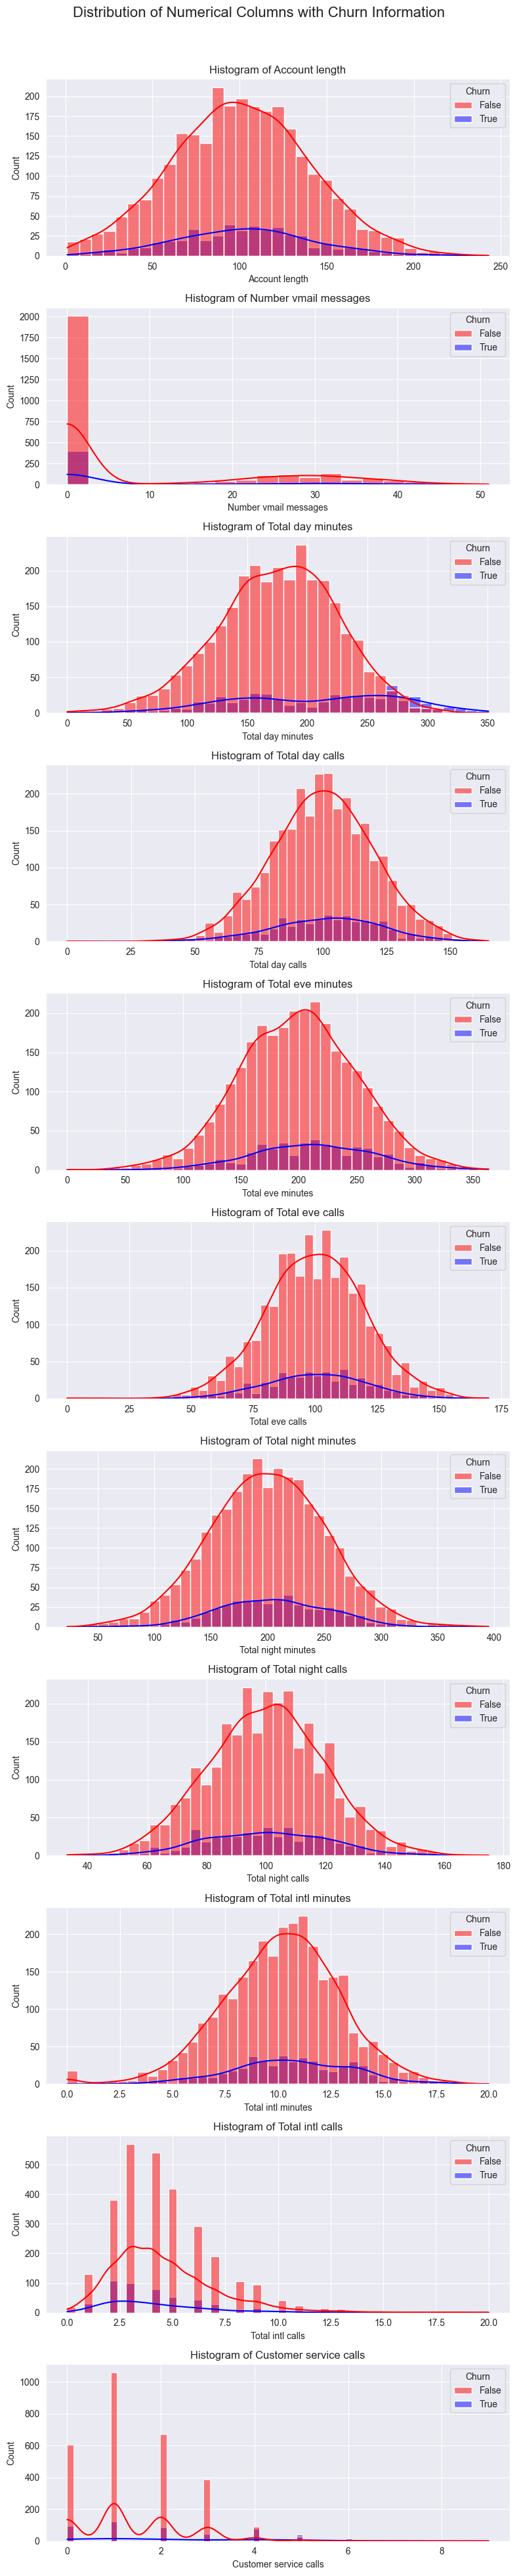

In [135]:
sns.set_style('darkgrid')
fig, axes = plt.subplots(11, 1, figsize=(8, 40))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(data=full_data, x=col, ax=axes[i], kde=True, hue='Churn', palette=['red', 'blue'])
    axes[i].set_title(f'Histogram of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


>applies a logarithmic transformation For Skewed columns

In [136]:
columns_to_transform = ['Number vmail messages', 'Total intl calls', 'Customer service calls']

# Add 1 to avoid log(0)
for col in columns_to_transform:
    full_data[col] = np.log1p(full_data[col])

## ***Boxplot***

> ### To Check Outliers 

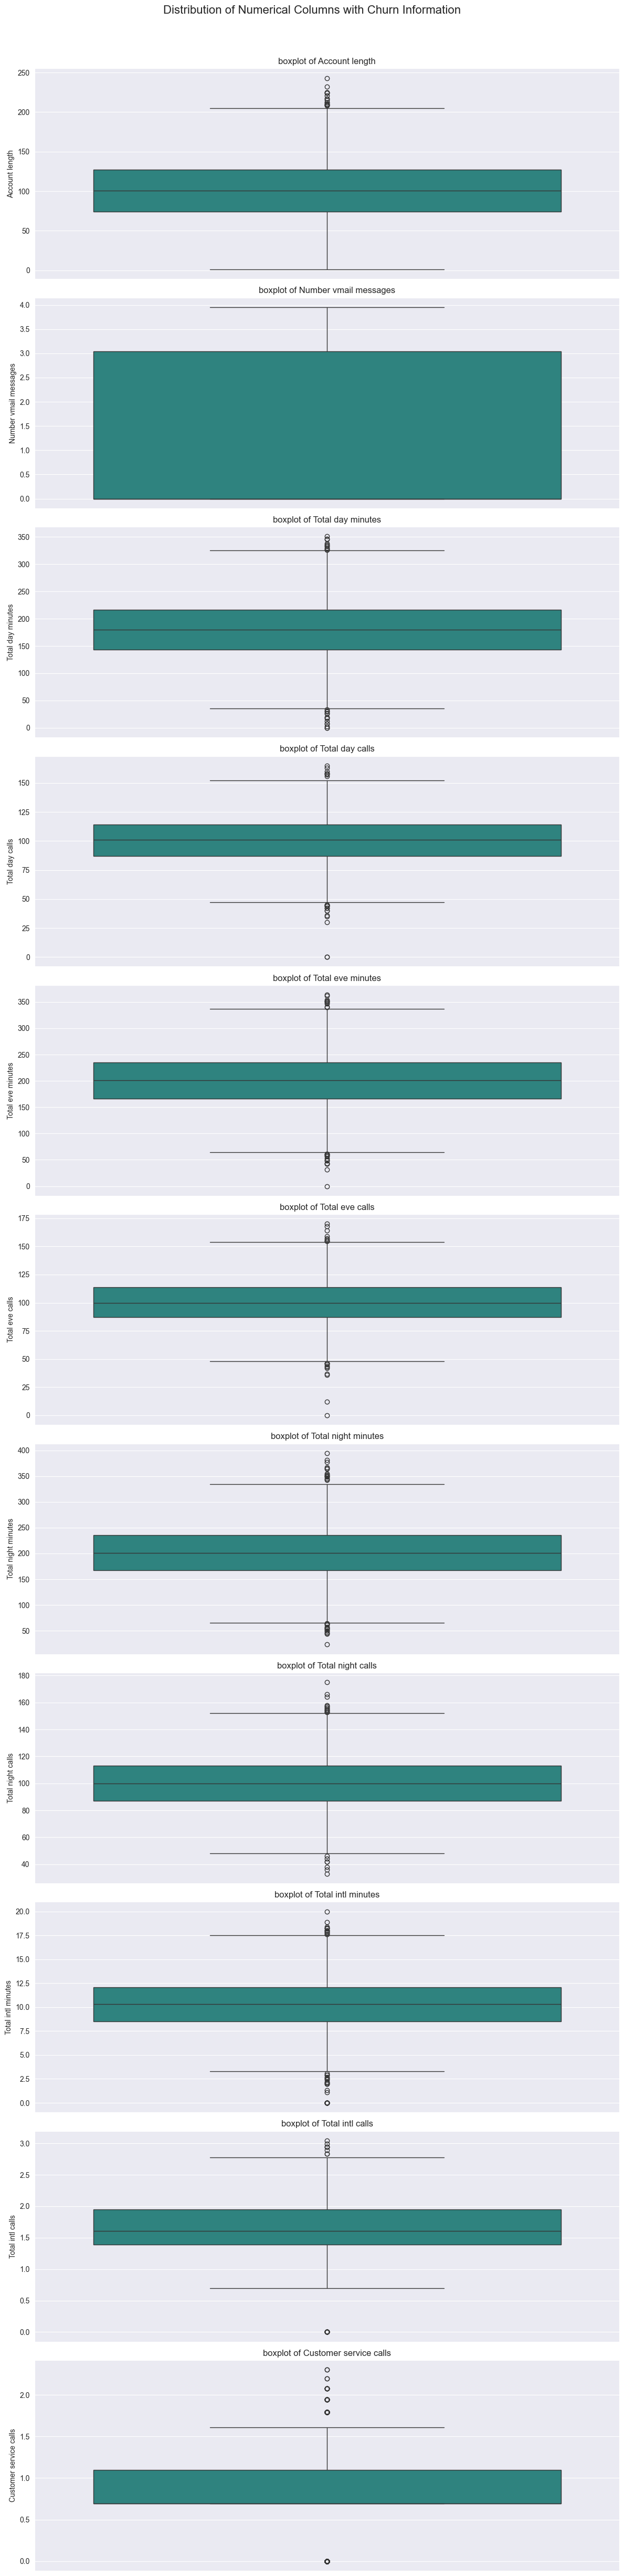

In [137]:
fig, axes = plt.subplots(11, 1, figsize=(12, 50))

# Plot histograms for each numerical column
for i, col in enumerate(numerical_columns):
    sns.boxplot(data=full_data, y=col, ax=axes[i],palette='viridis')
    axes[i].set_title(f'boxplot of {col}')

# Add the suptitle
fig.suptitle('Distribution of Numerical Columns with Churn Information', fontsize=16)

# Adjust layout to make space for the suptitle
plt.tight_layout(rect=[0, 0, 1, 0.97])

# Show the plot
plt.show()


> ## ***distribution of Categorical data***

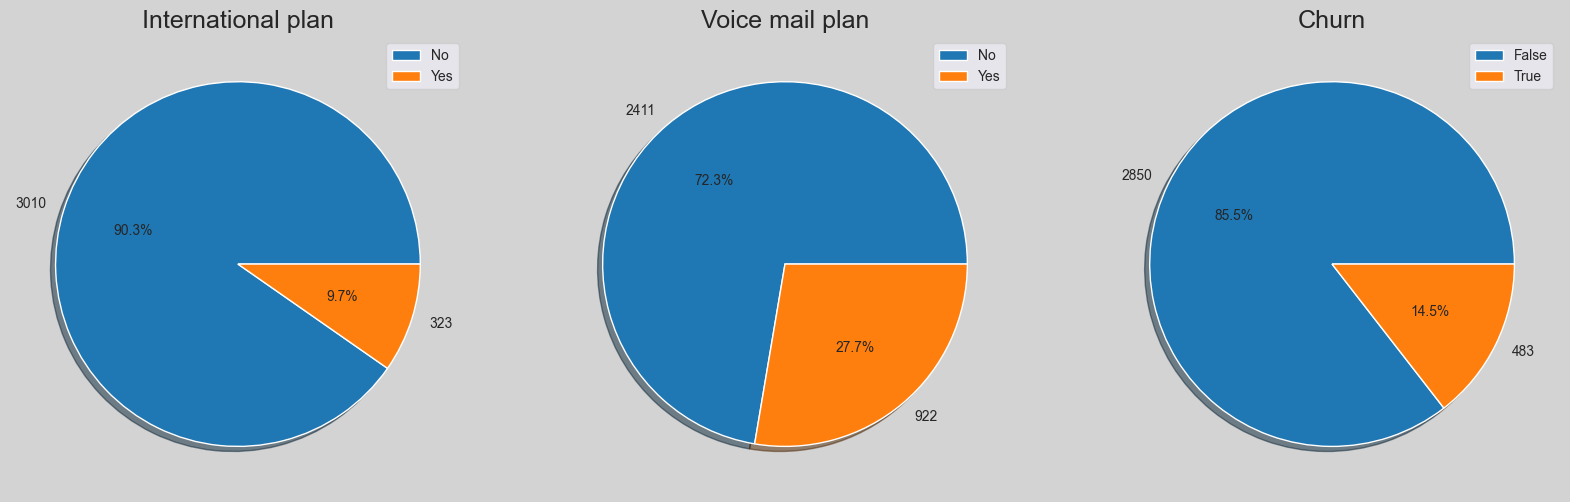

In [138]:
ig, axes = plt.subplots(1, 3, figsize=(20, 12), facecolor="lightgray")

for i, column in enumerate(cat_columns[:3]):
    ax = axes[i]
    d = full_data[column].value_counts()
    ax.pie(d, labels=d.values,autopct="%1.1f%%",shadow=True)
    ax.set_title(column,size=18)
    ax.legend(d.index)

### ***Numerical Features by Churn Status***

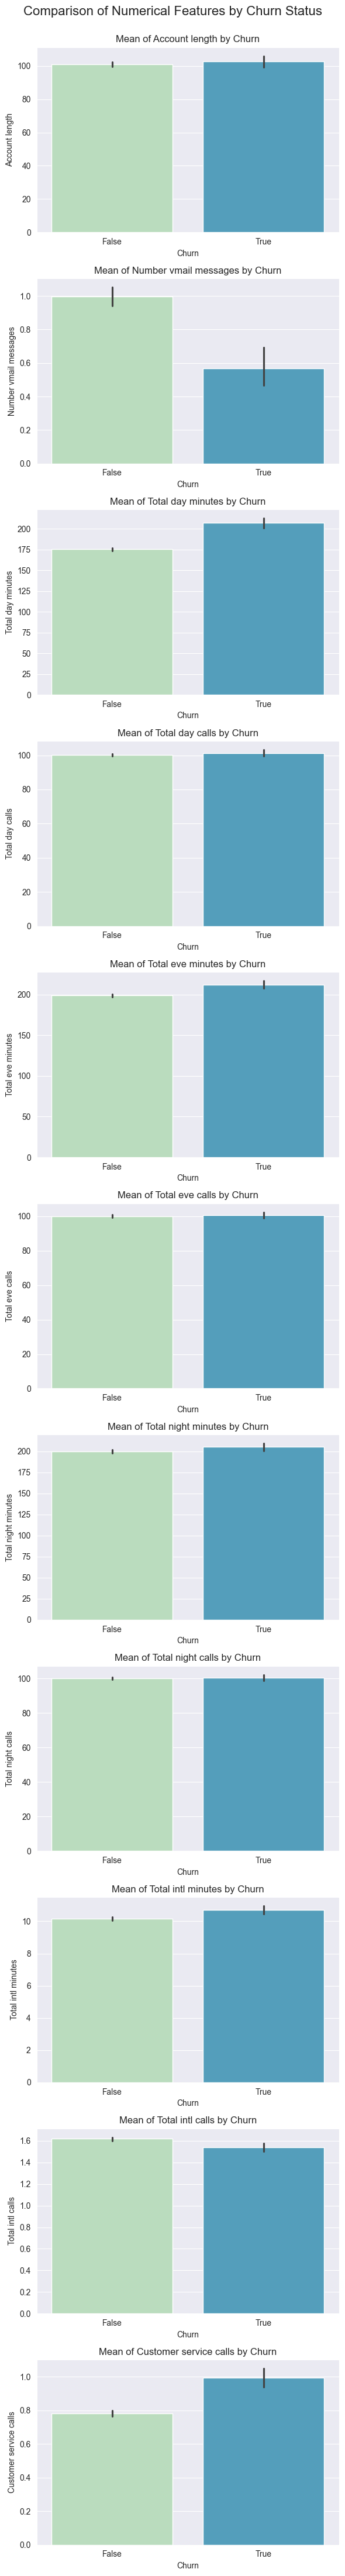

In [139]:
fig, axes = plt.subplots(11, 1, figsize=(6, 44))
for i, col in enumerate(numerical_columns):
    sns.barplot(data=full_data, x='Churn', y=col, ax=axes[i], palette='GnBu')
    axes[i].set_title(f'Mean of {col} by Churn', fontsize=12)

fig.suptitle('Comparison of Numerical Features by Churn Status', fontsize=16 , y =1)

plt.tight_layout()
plt.show()


Text(0.5, 1.0, ' ')

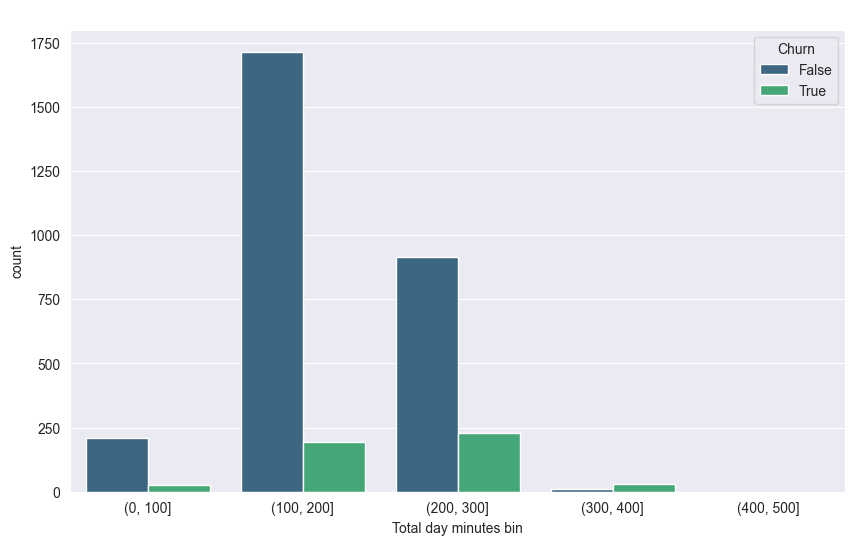

In [140]:

plt.figure(figsize=(10, 6))
sns.countplot(x = 'Total day minutes bin' , data = full_data , hue='Churn' , palette='viridis' )
plt.title(' ')

### ***Distribution***

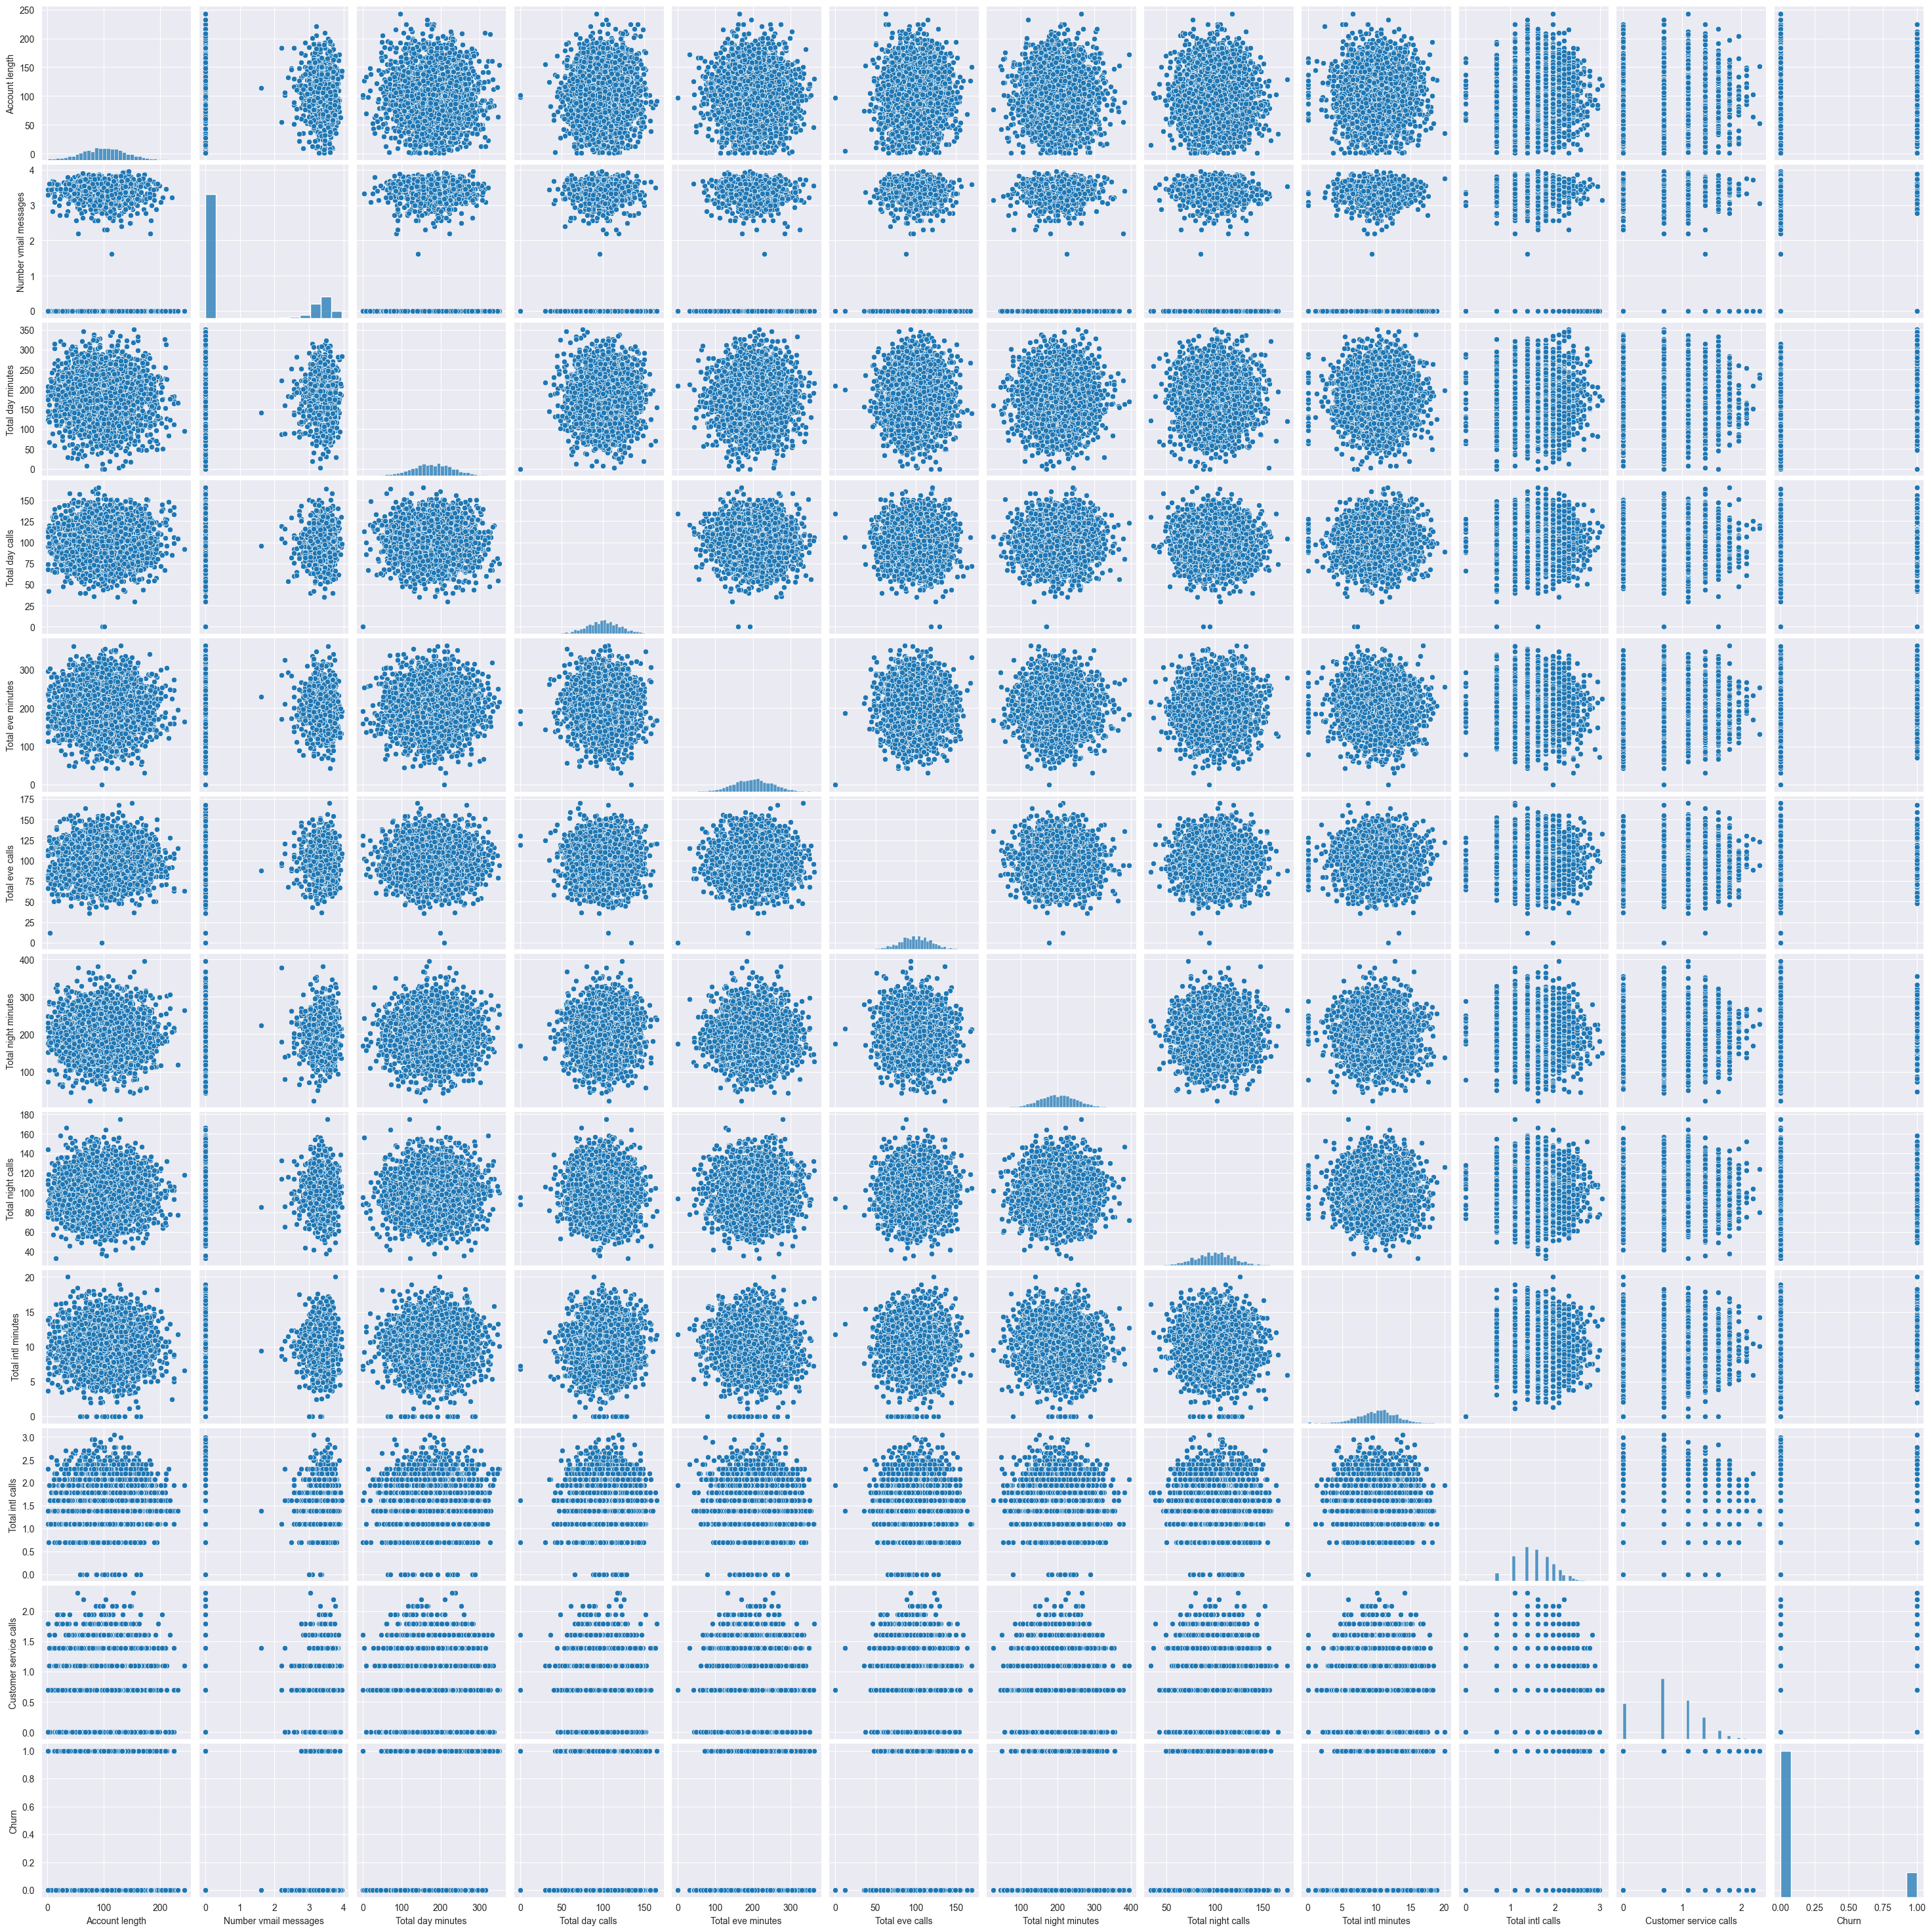

In [141]:
sns.pairplot(full_data)

<p style="background-color:#f0f8ff;font-family:Arial;color:#2c3e50;font-size:300%;text-align:center;border-radius:40px 40px;"><i>Churn Prediction</i></p>



## ***1. Data Preprocessing: Encoding, Scaling & Splitting The Data***




In [142]:
full_data.drop('Total day minutes bin' , axis=1 , inplace=True)

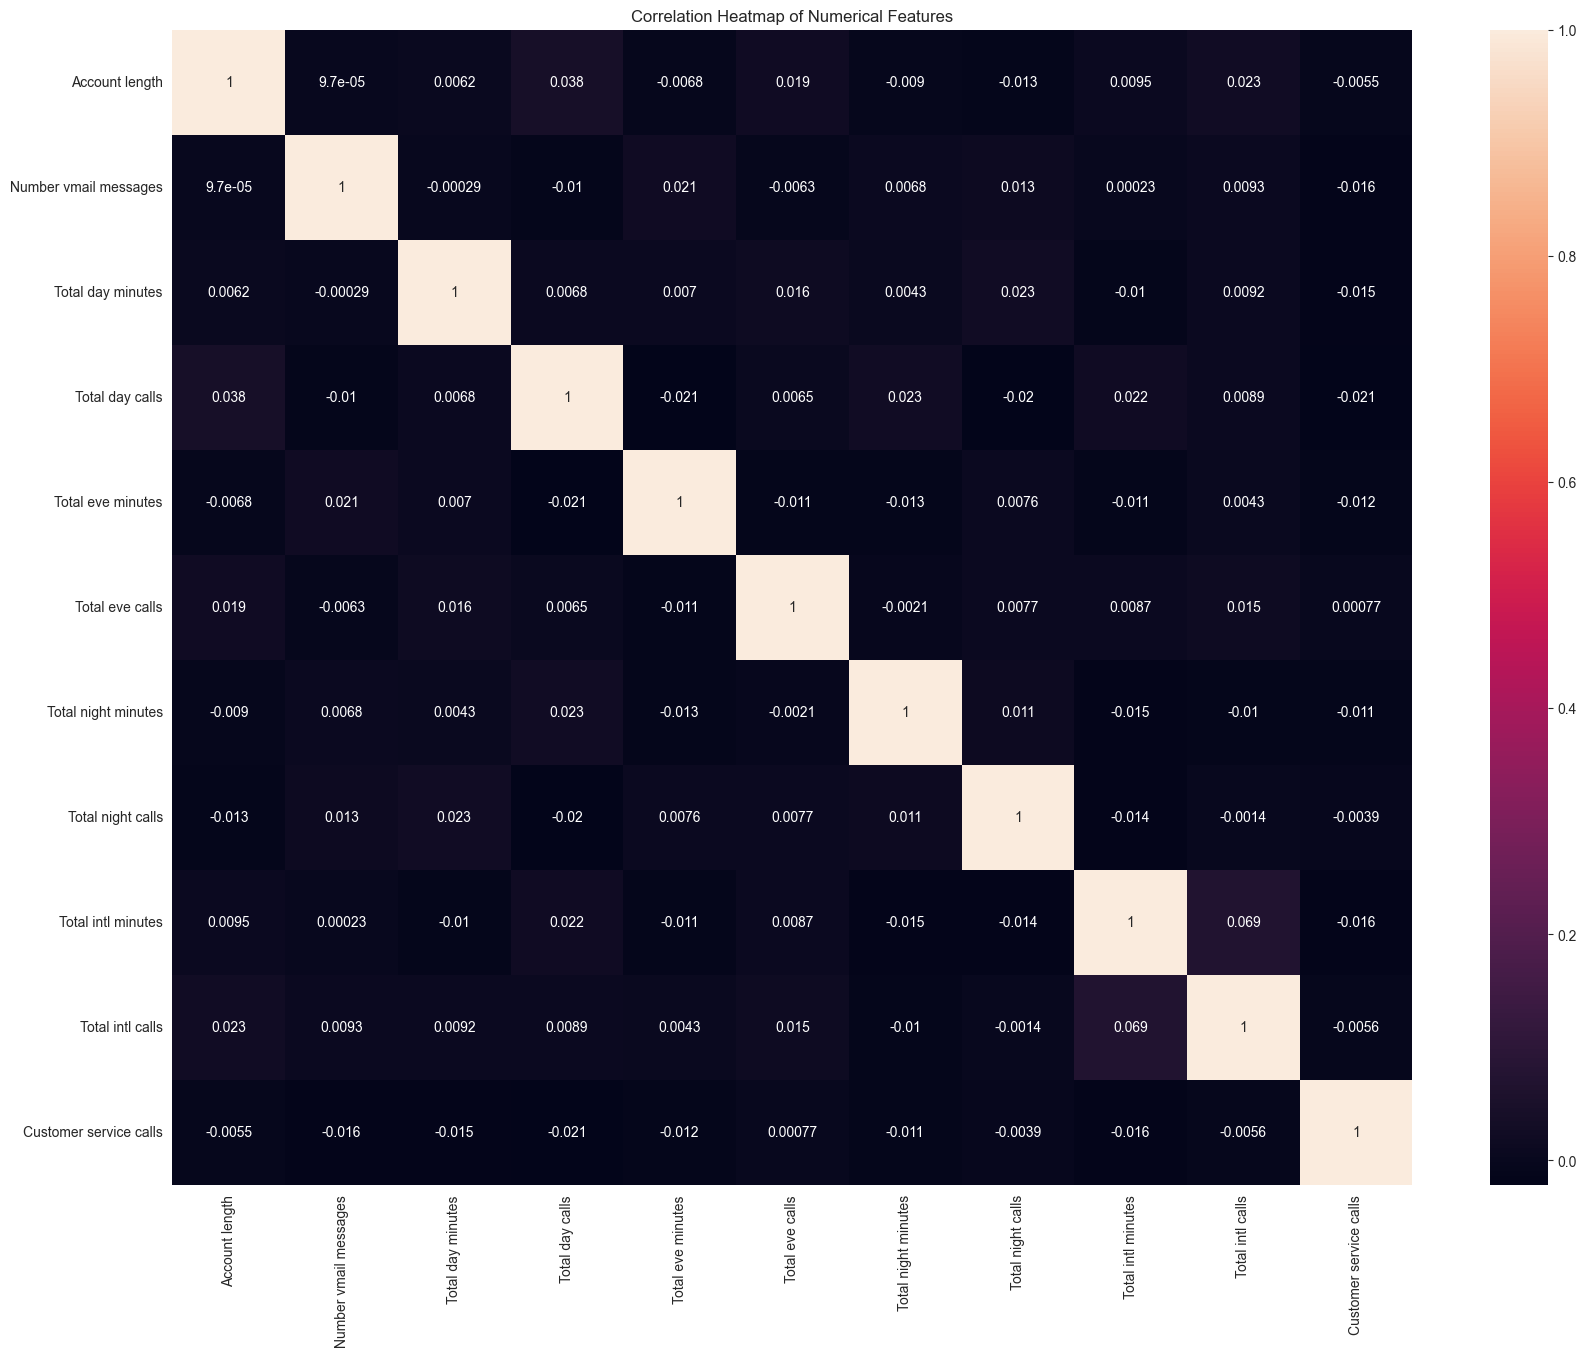

In [143]:
# Plotting the correlation heatmap for numerical features
plt.figure(figsize=(20, 15))
sns.heatmap(full_data.select_dtypes(include='number').corr(), annot=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()

> ## **Encoding**

In [144]:
full_data['Churn'] = full_data['Churn'].map({False: 0, True: 1})


In [145]:
#  Split into features (X) and target (y)
X = full_data.drop('Churn', axis=1)  # Features
y = full_data['Churn']  # Target

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Label Encoding for Categorical Features


In [146]:
# Step 1: Apply label encoding to categorical features in train and test sets
label_encoder = LabelEncoder()

# Encode "International plan" in train and test sets
X_train['International plan'] = label_encoder.fit_transform(X_train['International plan'])
X_test['International plan'] = label_encoder.transform(X_test['International plan'])

# Encode "Voice mail plan" in train and test sets
X_train['Voice mail plan'] = label_encoder.fit_transform(X_train['Voice mail plan'])
X_test['Voice mail plan'] = label_encoder.transform(X_test['Voice mail plan'])

## Check data imbalance

<Axes: xlabel='Churn', ylabel='count'>

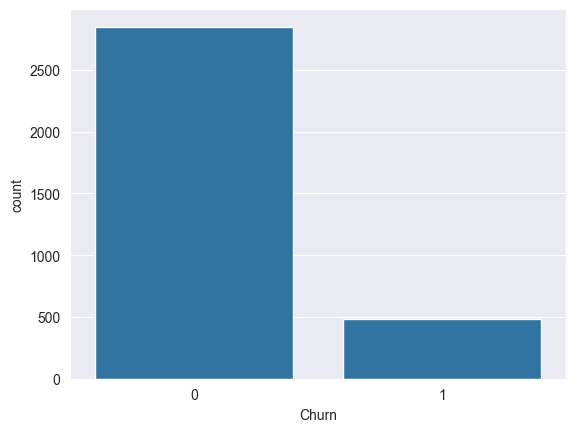

In [147]:
sns.countplot(data=full_data ,x='Churn' )

### Handling Class Imbalance using SMOTE

In [148]:
# Apply SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train, y_train = smote.fit_resample(X_train, y_train)

<Axes: xlabel='Churn', ylabel='count'>

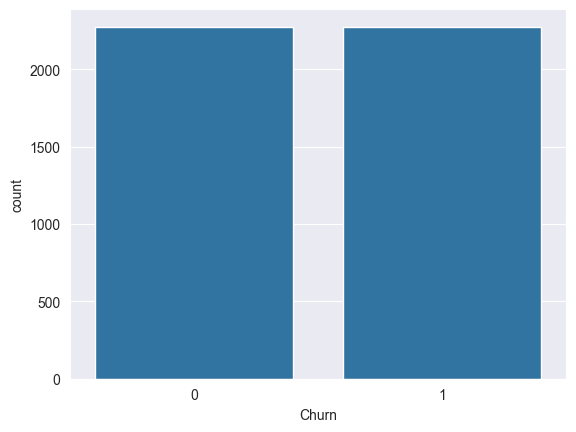

In [149]:
sns.countplot(data=pd.DataFrame(y_train) ,x='Churn' )

>Log Transformation For skewed data 


In [150]:
# columns_to_transform = ['Number vmail messages', 'Total intl calls', 'Customer service calls']

# # Add 1 to avoid log(0)
# for col in columns_to_transform:
#     full_data[col] = np.log1p(full_data[col])

# # Display the transformed columns
# print(full_data[[col for col in columns_to_transform]].head())

### Scaling Numerical Features

In [151]:
X_train

Account length  International plan  Voice mail plan  \
0                 87                   0                0   
1                 92                   0                0   
2                 58                   0                0   
3                113                   1                0   
4                 66                   0                1   
...              ...                 ...              ...   
4547             124                   0                0   
4548              91                   0                0   
4549             115                   0                0   
4550              55                   0                0   
4551             122                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                  0.000000         234.800000               85   
1                  0.000000         157.700000              101   
2                  0.000000         149.400000              145   
3                  0.000000         125.200000               93   
4                  3.713572         141.700000               87   
...                     ...                ...              ...   
4547               0.000000         236.800186              131   
4548               0.000000         271.332993               97   
4549               0.165505         140.220948               90   
4550               0.000000         273.373581               83   
4551               0.000000          67.472400               96   

      Total eve minutes  Total eve calls  Total night minutes  \
0            140.900000               91           204.300000   
1            298.600000              100           216.900000   
2            196.500000              105           209.500000   
3            206.400000              119           129.300000   
4            268.300000               89           241.300000   
...                 ...              ...                  ...   
4547         264.614775               89           220.609788   
4548         240.174729              131           147.496933   
4549         193.204885               96           151.412285   
4550         248.700000               75           194.563537   
4551         196.150641              121           158.649647   

      Total night calls  Total intl minutes  Total intl calls  \
0                    93            9.500000          1.791759   
1                    99           13.800000          1.386294   
2                   108           14.900000          1.386294   
3                   139            8.300000          2.197225   
4                    68            8.500000          2.079442   
...                 ...                 ...               ...   
4547                 73           11.441591          1.827118   
4548                100            8.781261          1.960052   
4549                 75            9.396378          1.386294   
4550                111            9.381814          1.238210   
4551                 99           10.816399          1.515841   

      Customer service calls  
0                   0.693147  
1                   0.693147  
2                   0.693147  
3                   0.000000  
4                   0.000000  
...                      ...  
4547                0.955463  
4548                0.693147  
4549                2.054276  
4550                0.736711  
4551                1.225102  

[4552 rows x 13 columns]

In [152]:
X_train

Account length  International plan  Voice mail plan  \
0                 87                   0                0   
1                 92                   0                0   
2                 58                   0                0   
3                113                   1                0   
4                 66                   0                1   
...              ...                 ...              ...   
4547             124                   0                0   
4548              91                   0                0   
4549             115                   0                0   
4550              55                   0                0   
4551             122                   0                0   

      Number vmail messages  Total day minutes  Total day calls  \
0                  0.000000         234.800000               85   
1                  0.000000         157.700000              101   
2                  0.000000         149.400000              145   
3                  0.000000         125.200000               93   
4                  3.713572         141.700000               87   
...                     ...                ...              ...   
4547               0.000000         236.800186              131   
4548               0.000000         271.332993               97   
4549               0.165505         140.220948               90   
4550               0.000000         273.373581               83   
4551               0.000000          67.472400               96   

      Total eve minutes  Total eve calls  Total night minutes  \
0            140.900000               91           204.300000   
1            298.600000              100           216.900000   
2            196.500000              105           209.500000   
3            206.400000              119           129.300000   
4            268.300000               89           241.300000   
...                 ...              ...                  ...   
4547         264.614775               89           220.609788   
4548         240.174729              131           147.496933   
4549         193.204885               96           151.412285   
4550         248.700000               75           194.563537   
4551         196.150641              121           158.649647   

      Total night calls  Total intl minutes  Total intl calls  \
0                    93            9.500000          1.791759   
1                    99           13.800000          1.386294   
2                   108           14.900000          1.386294   
3                   139            8.300000          2.197225   
4                    68            8.500000          2.079442   
...                 ...                 ...               ...   
4547                 73           11.441591          1.827118   
4548                100            8.781261          1.960052   
4549                 75            9.396378          1.386294   
4550                111            9.381814          1.238210   
4551                 99           10.816399          1.515841   

      Customer service calls  
0                   0.693147  
1                   0.693147  
2                   0.693147  
3                   0.000000  
4                   0.000000  
...                      ...  
4547                0.955463  
4548                0.693147  
4549                2.054276  
4550                0.736711  
4551                1.225102  

[4552 rows x 13 columns]

In [153]:
numerical_columns = ['Account length',
 'Number vmail messages',
 'Total day minutes',
 'Total day calls',

 'Total eve minutes',
 'Total eve calls',

 'Total night minutes',
 'Total night calls',

 'Total intl minutes',
 'Total intl calls',

 'Customer service calls']
# Initialize the StandardScaler because data is normaly distributed
scaler = StandardScaler()

# Apply Standard Scaling to training and testing data
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])



### Correlation Matrix Including Target

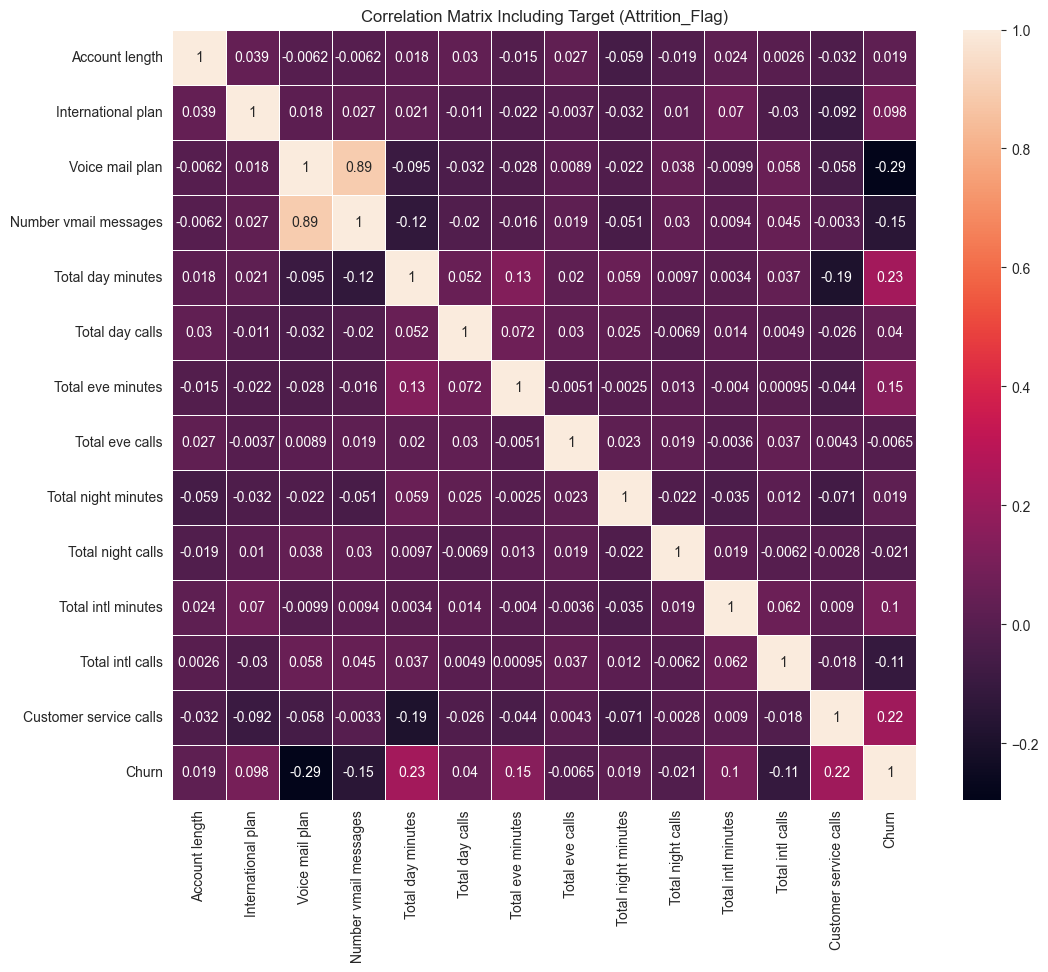

In [154]:
# Correlation matrix including target value
train = pd.concat([X_train, y_train], axis=1)
corr_matrix = train.corr()

# Heatmap to visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, linewidths=0.5)
plt.title('Correlation Matrix Including Target (Attrition_Flag)')
plt.show()

## **2. Model Building**



Model: XGBoost
Confusion Matrix:
[[568   6]
 [ 18  75]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       574
           1       0.93      0.81      0.86        93

    accuracy                           0.96       667
   macro avg       0.95      0.90      0.92       667
weighted avg       0.96      0.96      0.96       667



<Figure size 1200x800 with 0 Axes>

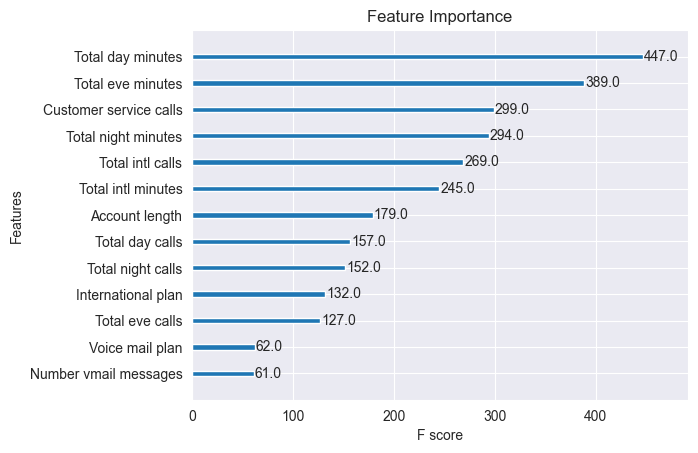

In [155]:
results = []

# Initializing the XGBoost classifiera

xgb_model = XGBClassifier(
    random_state=42,
    learning_rate = 0.1
)
xgb_model.fit(X_train, y_train)

# Predict on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate metrics for XGBoost
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
recall_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)
precision_xgb = precision_score(y_test, y_pred_xgb)

# Append XGBoost results to the list
results.append({
    'Model': 'XGBoost',
    'Accuracy': accuracy_xgb,
    'Recall': recall_xgb,
    'F1-Score': f1_xgb,
    'Precision': precision_xgb,
    'Best Parameters': {
        "Without grid-search"
    }
})

# Display XGBoost results
print("\nModel: XGBoost")
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))
# Plotting feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, importance_type='weight')
plt.title('Feature Importance')
plt.xlabel('F score')
plt.ylabel('Features')
plt.show()

## **3. Hyperparameter Tuning for Multiple Models**


In [156]:
# Dictionary of models and their parameter grids (excluding XGBoost)
models_params = {
    "Logistic Regression": (LogisticRegression(solver='liblinear'), {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'penalty': ['l1', 'l2'],  # L1 and L2 penalties
        'max_iter': [100, 200, 300],
    }),

    "Naive Bayes": (GaussianNB(), {
        # GaussianNB doesn't have many hyperparameters to tune
    }),

    "K-Nearest Neighbors": (KNeighborsClassifier(), {
        'n_neighbors': [3, 5, 7, 10],
        'weights': ['uniform', 'distance'],
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    }),

    "Decision Tree Classifier": (DecisionTreeClassifier(), {
        'max_depth': [None, 5, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    }),

    "Random Forest": (RandomForestClassifier(class_weight='balanced'), {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'criterion': ['gini', 'entropy'],
    }),

    "AdaBoost": (AdaBoostClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 1, 10],
    }),

    "Gradient Boosting": (GradientBoostingClassifier(), {
        'n_estimators': [50, 100, 200],
        'learning_rate': [0.01, 0.1, 0.2],
        'max_depth': [3, 5, 7],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
    })
}

# Model training with tqdm and GridSearchCV (excluding XGBoost)
for name, (model, params) in tqdm(models_params.items(), desc="Training models", total=len(models_params)):
    # Perform Grid Search with Recall as the scoring metric
    grid_search = GridSearchCV(estimator=model, param_grid=params, scoring='recall', cv=5, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best model and its parameters
    best_model = grid_search.best_estimator_
    best_params = grid_search.best_params_

    # Model prediction
    model_pred = best_model.predict(X_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, model_pred)
    recall = recall_score(y_test, model_pred)
    f1 = f1_score(y_test, model_pred)
    precision = precision_score(y_test, model_pred)

    # Append results to the list
    results.append({
        'Model': name,
        'Accuracy': accuracy,
        'Recall': recall,
        'F1-Score': f1,
        'Precision': precision,
        'Best Parameters': best_params
    })

    # Displaying model results
    print(f"\nModel: {name}")
    print(f"Best Parameters: {best_params}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, model_pred))
    print("\nClassification Report:")
    print(classification_report(y_test, model_pred))



Training models:  29%|██▊       | 2/7 [00:06<00:13,  2.76s/it]


Model: Logistic Regression
Best Parameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}
Confusion Matrix:
[[437 137]
 [ 34  59]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.84       574
           1       0.30      0.63      0.41        93

    accuracy                           0.74       667
   macro avg       0.61      0.70      0.62       667
weighted avg       0.84      0.74      0.78       667


Model: Naive Bayes
Best Parameters: {}
Confusion Matrix:
[[309 265]
 [ 24  69]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68       574
           1       0.21      0.74      0.32        93

    accuracy                           0.57       667
   macro avg       0.57      0.64      0.50       667
weighted avg       0.83      0.57      0.63       667



Training models:  43%|████▎     | 3/7 [00:13<00:19,  4.79s/it]


Model: K-Nearest Neighbors
Best Parameters: {'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'distance'}
Confusion Matrix:
[[485  89]
 [ 41  52]]

Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       574
           1       0.37      0.56      0.44        93

    accuracy                           0.81       667
   macro avg       0.65      0.70      0.66       667
weighted avg       0.84      0.81      0.82       667



Training models:  57%|█████▋    | 4/7 [00:19<00:15,  5.21s/it]


Model: Decision Tree Classifier
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2}
Confusion Matrix:
[[524  50]
 [ 21  72]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.91      0.94       574
           1       0.59      0.77      0.67        93

    accuracy                           0.89       667
   macro avg       0.78      0.84      0.80       667
weighted avg       0.91      0.89      0.90       667



Training models:  71%|███████▏  | 5/7 [05:11<03:37, 108.68s/it]


Model: Random Forest
Best Parameters: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Confusion Matrix:
[[566   8]
 [ 31  62]]

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.89      0.67      0.76        93

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.86       667
weighted avg       0.94      0.94      0.94       667



Training models:  86%|████████▌ | 6/7 [05:25<01:16, 76.42s/it] 


Model: AdaBoost
Best Parameters: {'learning_rate': 1, 'n_estimators': 100}
Confusion Matrix:
[[539  35]
 [ 40  53]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       574
           1       0.60      0.57      0.59        93

    accuracy                           0.89       667
   macro avg       0.77      0.75      0.76       667
weighted avg       0.89      0.89      0.89       667



Training models: 100%|██████████| 7/7 [22:39<00:00, 194.26s/it]


Model: Gradient Boosting
Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}
Confusion Matrix:
[[569   5]
 [ 20  73]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       574
           1       0.94      0.78      0.85        93

    accuracy                           0.96       667
   macro avg       0.95      0.89      0.92       667
weighted avg       0.96      0.96      0.96       667



>## Make a results in DataFrame

In [157]:
results_df = pd.DataFrame(results)
# Display the DataFrame
print("\nSummary of Model Performance:")
results_df.sort_values(by='Accuracy' , ascending=False)


Summary of Model Performance:


Model  Accuracy    Recall  F1-Score  Precision  \
0                   XGBoost  0.964018  0.806452  0.862069   0.925926   
7         Gradient Boosting  0.962519  0.784946  0.853801   0.935897   
5             Random Forest  0.941529  0.666667  0.760736   0.885714   
4  Decision Tree Classifier  0.893553  0.774194  0.669767   0.590164   
6                  AdaBoost  0.887556  0.569892  0.585635   0.602273   
3       K-Nearest Neighbors  0.805097  0.559140  0.444444   0.368794   
1       Logistic Regression  0.743628  0.634409  0.408304   0.301020   
2               Naive Bayes  0.566717  0.741935  0.323185   0.206587   

                                     Best Parameters  
0                              {Without grid-search}  
7  {'learning_rate': 0.1, 'max_depth': 7, 'min_sa...  
5  {'criterion': 'gini', 'max_depth': 20, 'min_sa...  
4  {'criterion': 'entropy', 'max_depth': 20, 'min...  
6          {'learning_rate': 1, 'n_estimators': 100}  
3  {'algorithm': 'auto', 'n_neighbors': 3, 'weigh...  
1       {'C': 0.1, 'max_iter': 100, 'penalty': 'l2'}  
2                                                 {}

>## models with their hyperparameterss & Plot Confusion Matrix

Training Model: Logistic Regression
Confusion Matrix:
[[435 139]
 [ 34  59]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.76      0.83       574
           1       0.30      0.63      0.41        93

    accuracy                           0.74       667
   macro avg       0.61      0.70      0.62       667
weighted avg       0.84      0.74      0.77       667



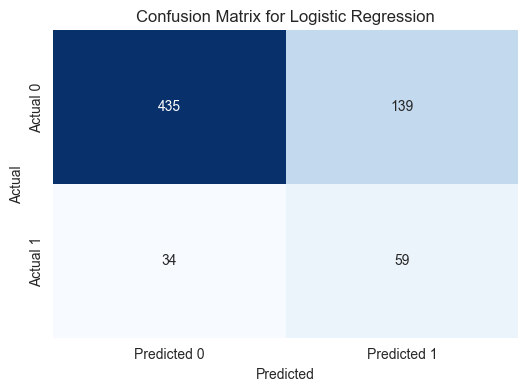

--------------------------------------------------
Training Model: Naive Bayes
Confusion Matrix:
[[309 265]
 [ 24  69]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.54      0.68       574
           1       0.21      0.74      0.32        93

    accuracy                           0.57       667
   macro avg       0.57      0.64      0.50       667
weighted avg       0.83      0.57      0.63       667



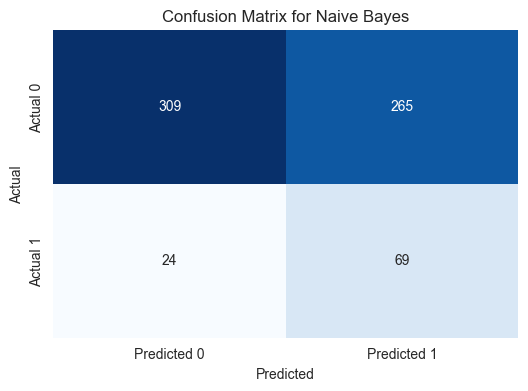

--------------------------------------------------
Training Model: K-Nearest Neighbors
Confusion Matrix:
[[485  89]
 [ 41  52]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.84      0.88       574
           1       0.37      0.56      0.44        93

    accuracy                           0.81       667
   macro avg       0.65      0.70      0.66       667
weighted avg       0.84      0.81      0.82       667



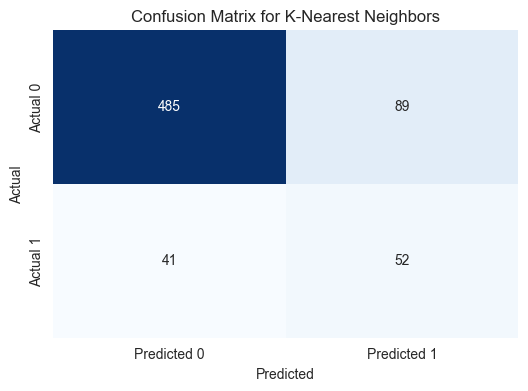

--------------------------------------------------
Training Model: Decision Tree
Confusion Matrix:
[[527  47]
 [ 22  71]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94       574
           1       0.60      0.76      0.67        93

    accuracy                           0.90       667
   macro avg       0.78      0.84      0.81       667
weighted avg       0.91      0.90      0.90       667



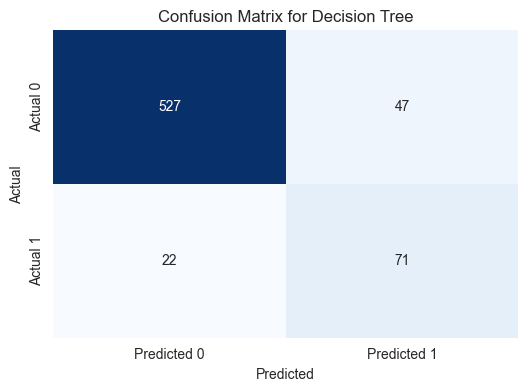

--------------------------------------------------
Training Model: Random Forest
Confusion Matrix:
[[567   7]
 [ 31  62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       574
           1       0.90      0.67      0.77        93

    accuracy                           0.94       667
   macro avg       0.92      0.83      0.87       667
weighted avg       0.94      0.94      0.94       667



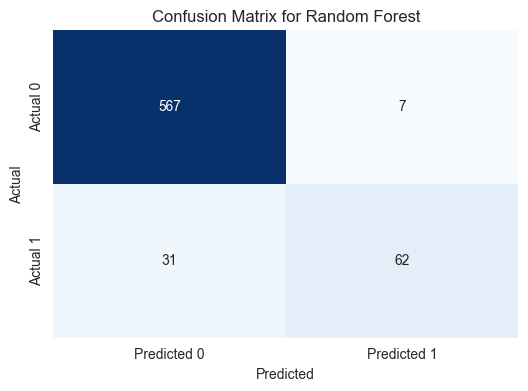

--------------------------------------------------
Training Model: AdaBoost
Confusion Matrix:
[[539  35]
 [ 40  53]]
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.94      0.93       574
           1       0.60      0.57      0.59        93

    accuracy                           0.89       667
   macro avg       0.77      0.75      0.76       667
weighted avg       0.89      0.89      0.89       667



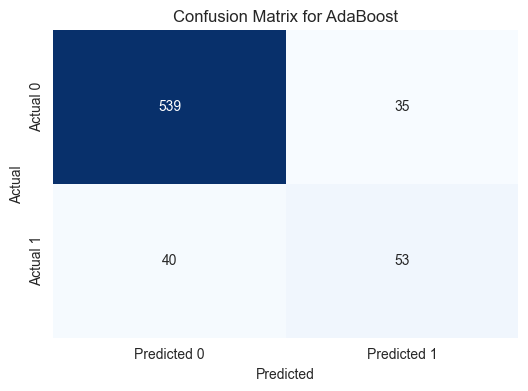

--------------------------------------------------
Training Model: Gradient Boosting
Confusion Matrix:
[[567   7]
 [ 21  72]]
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       574
           1       0.91      0.77      0.84        93

    accuracy                           0.96       667
   macro avg       0.94      0.88      0.91       667
weighted avg       0.96      0.96      0.96       667



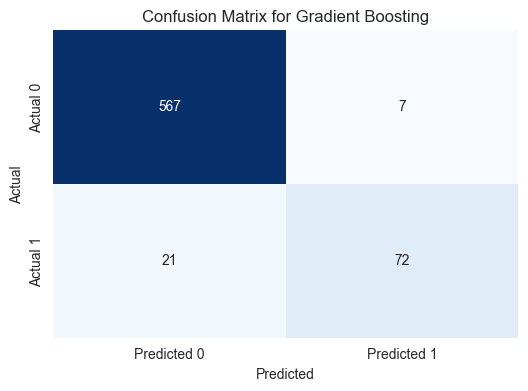

--------------------------------------------------


In [158]:
# Define models with their hyperparameters
models = {
    "Logistic Regression": LogisticRegression(C=0.1, max_iter=100, penalty='l2'),
    "Naive Bayes": GaussianNB(),
    "K-Nearest Neighbors": KNeighborsClassifier(n_neighbors=3, weights='distance', algorithm='auto'),
    "Decision Tree": DecisionTreeClassifier(criterion='entropy', max_depth=None, min_samples_leaf=1, min_samples_split=2),
    "Random Forest": RandomForestClassifier(criterion='entropy', max_depth=20, min_samples_leaf=1, min_samples_split=2, n_estimators=200),
    "AdaBoost": AdaBoostClassifier(learning_rate=1, n_estimators=100),
    "Gradient Boosting": GradientBoostingClassifier(learning_rate=0.2, max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=100)
}

# Train and evaluate each model
for model_name, model in models.items():
    print(f"Training Model: {model_name}")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print("Confusion Matrix:")
    print(cm)
    
    # Classification Report
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Plot Confusion Matrix as Heatmap
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Predicted 0', 'Predicted 1'],
                yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    print("-" * 50)